# Unsupervised Machine Learning algorithms with Python
---
#### By Jaime de Cecilio

Database Dwellings.

We are going to put into practice the virtues seen in class of the different unsupervised learning algorithms that we have classified in the following blocks:

   - Dimensional reduction - PCA, KERNEL PCA, SPARSE PCA,....
   - Projection or representation (MAINFOLD) - TSNE, UMAP, ISOMAP,...
   - Clustering: kmeans, hierarchical clustering, gaussian mixture models, dbscan,....

Remember the need to work with normalized variables and the need to perform transformations on categorical variables with some of the algorithms.

Note that we have also seen several ways of representing the output of these data and hyperparameter selection processes (number of components, distance function to use, neighborhood size, preplexity,... depending on the case)

The database on which you will work is a historical table containing information on different properties, their characteristics, appraisals and sales price.

All the questions should be done on the set of cases that represent houses located in residential areas (high, medium and low density).

PART 1.

- Question 1.1 Perform a first transformation of the data in which you generate a train set and a test set.

- Question 1.2 Generate a new train table with new numerical columns associated to the categorical variables that you think are appropriate and that you are going to use. Edit the missing values (use the previous practice).

- Question 2 In what ways could you identify outliers?

- Question 2.1 Apply either a PCA or another projection algorithm to identify low frequency or peculiar groups taking into account all possible dimensions (you don't have to use all of them).

- Question 2.2 Which clustering algorithm and on which variables (could be the above components...) would you apply to properly identify those rare values?

- Question 3: You studied the relationship of the price variable with the rest of the quantitative variables during 2009 and 2010. Study the correlation between them and argue the use of PCA or KernelPCA based on those relationships.

- Question 3.1: Apply the chosen model and describe the first 3 components generated, what variance does each one explain? What variables is each one related to? As indicators of variance in the system and based on the relationship with other variables, what names would you give them?

PART 2. 

- Question 4: In the previous analysis we asked you to segment the sales price variable. Choose a couple of continuous variables more related to the value of the house and perform a cluster analysis. The new variable will be the categorization not only of price, but also of value. Graph the relationship of this new categorical variable (the cluster) with the quantitative variables as a whole, also the centroids. Interpret the results (for the years 2009/2010).
- Question 5: Make a projection of the variables number of kitchen, swimming pool and garage space using tsne, umap or isomap in two dimensions, how is the price distributed in this projection? Is anything interesting identified (can you see that the groups of items have similar prices? can you draw similar conclusions as in question 4 of the descriptive analysis)?
- Question 6. The main characteristics of dwellings with stone facades versus those with exposed brick facades were described. Compare the result of a cluster analysis on the most important variables of this comparison (if too many apply a previous PCA) with the variable type of stone, does the generated cluster represent well that target variable?

We import the libraries and load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

from time import sleep
from random import shuffle

import numpy as np
from numpy import atleast_2d
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KDTree
from sklearn.decomposition import KernelPCA

from hdbscan import HDBSCAN

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import matplotlib.ticker as ticker
import seaborn as sns

from IPython import display
from pyod.models.knn import KNN



data = pd.read_excel("/Users/jaime2/Desktop/DATA SCIENCE/4.1 MODELOS NO SUPERVISADOS/ENTREGAS/ENTREGA_2/DB.xlsx")

#### 1- Transforming the data and generating the train set and test

In [3]:
data.columns = data.columns.str.replace(" ","_")
data.head(5)

,Order,MS_Zoning,Lot_Frontage,Lot_Area,Land_Contour,Land_Slope,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Type,...,Kitchen_Qual,TotRms_AbvGrd,Garage_Cars,Garage_Area,Garage_Cond,Pool_Area,Pool_QC,Mo_Sold,Yr_Sold,SalePrice
0,1,RL,141.0,31770,Lvl,Gtl,6,1960,1960,Stone,...,TA,7,2.0,528.0,TA,0,Sp,5,2010,215000
1,2,RH,80.0,11622,Lvl,Gtl,5,1961,1961,None,...,TA,5,1.0,730.0,TA,0,Sp,6,2010,105000
2,3,RL,81.0,14267,Lvl,Gtl,6,1958,1958,BrkFace,...,Gd,6,1.0,312.0,TA,0,Sp,6,2010,172000
3,4,RL,93.0,11160,Lvl,Gtl,7,1968,1968,None,...,Ex,8,2.0,522.0,TA,0,Sp,4,2010,244000
4,5,RL,74.0,13830,Lvl,Gtl,5,1997,1998,None,...,TA,6,2.0,482.0,TA,0,Sp,3,2010,189900


In [4]:
data.shape

(2930, 29)

In [5]:
def missing_summary(dataframe):
    num_elementos = data.count()
    num_missing = data.isna().sum()
    missing_summary = pd.DataFrame(index=num_elementos.index, 
                               data={'total':num_elementos, 
                                     'missing':num_missing,
                                     'missing_rate (%)': round(num_missing/num_elementos * 100, 2)})
    return missing_summary

In [6]:
data_summary = missing_summary(data)
data_summary

,total,missing,missing_rate (%)
Order,2930,0,0.00
MS_Zoning,2930,0,0.00
Lot_Frontage,2440,490,20.08
Lot_Area,2930,0,0.00
Land_Contour,2930,0,0.00
Land_Slope,2930,0,0.00
Overall_Qual,2930,0,0.00
Year_Built,2930,0,0.00
Year_Remod/Add,2930,0,0.00
Mas_Vnr_Type,2907,23,0.79


We impute values to the missing data.

In [7]:
data['Lot_Frontage'] = data['Lot_Frontage'].fillna(0)
data['Mas_Vnr_Type']= data['Mas_Vnr_Type'].fillna('None')
data['Garage_Cars']= data['Garage_Cars'].fillna(0)
data['Garage_Area']= data['Garage_Area'].fillna(0)
data['Garage_Cond']= data['Garage_Cond'].fillna('Sg')

In [8]:
#We check once again there is no more missing data. 

missing_summary(data)

,total,missing,missing_rate (%)
Order,2930,0,0.0
MS_Zoning,2930,0,0.0
Lot_Frontage,2930,0,0.0
Lot_Area,2930,0,0.0
Land_Contour,2930,0,0.0
Land_Slope,2930,0,0.0
Overall_Qual,2930,0,0.0
Year_Built,2930,0,0.0
Year_Remod/Add,2930,0,0.0
Mas_Vnr_Type,2930,0,0.0


We modify the data type and leave it as date format

In [9]:
data['Garage_Cars'] = data['Garage_Cars'].astype(int)
data['Date_Sold'] = pd.to_datetime(data['Yr_Sold'].astype(str) + '-' + data['Mo_Sold'].astype(str), format='%Y-%m')

**We generete the train and test set**

In [10]:
data.shape[0]*0.8

2344.0

In [11]:
train_index = np.random.choice(data.index,round(data.shape[0]*0.8),replace=False)
test_index = data.index[data.index.isin(train_index) == False]

In [12]:
data_train = data.copy().iloc[train_index,]
data_test = data.copy().iloc[test_index,]
data_test = data.copy().drop(train_index, axis=0)

In [13]:
from sklearn.model_selection import train_test_split
dt_train, dt_test = train_test_split(data, test_size =0.2)

In [14]:
dt_train.reset_index(drop=True)

,Order,MS_Zoning,Lot_Frontage,Lot_Area,Land_Contour,Land_Slope,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Type,...,TotRms_AbvGrd,Garage_Cars,Garage_Area,Garage_Cond,Pool_Area,Pool_QC,Mo_Sold,Yr_Sold,SalePrice,Date_Sold
0,824,RL,68.0,10769,Lvl,Gtl,8,2007,2007,None,...,7,2,578.0,TA,0,Sp,4,2009,212000,2009-04-01
1,2311,RL,60.0,8238,Lvl,Gtl,6,1997,1998,None,...,6,2,400.0,TA,0,Sp,5,2006,183500,2006-05-01
2,84,RM,68.0,8930,Lvl,Gtl,6,1978,1978,None,...,8,2,539.0,TA,0,Sp,4,2010,112000,2010-04-01
3,961,RL,79.0,14463,HLS,Gtl,9,2008,2008,BrkFace,...,7,3,885.0,TA,0,Sp,1,2009,316500,2009-01-01
4,1870,RL,78.0,10530,Lvl,Gtl,7,1993,1993,BrkFace,...,8,2,473.0,TA,0,Sp,8,2007,255000,2007-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,313,RL,0.0,12328,Lvl,Gtl,6,1976,1976,BrkFace,...,6,3,888.0,TA,0,Sp,5,2010,169900,2010-05-01
2340,232,RL,60.0,9600,Lvl,Gtl,4,1950,1995,None,...,4,2,436.0,TA,0,Sp,2,2010,128000,2010-02-01
2341,456,RL,34.0,5001,Lvl,Gtl,7,2007,2008,Stone,...,6,2,626.0,TA,0,Sp,7,2009,230000,2009-07-01
2342,1867,RL,130.0,11700,Lvl,Gtl,6,1968,1968,BrkFace,...,6,2,528.0,TA,0,Sp,4,2007,164000,2007-04-01


#### 2- PCA and outliers 

We proceed to perform the PCA only with numerical variables.

In [15]:
dt_num_train = dt_train.select_dtypes(include=np.number)
df_ms_num_train = missing_summary(dt_num_train)

In [16]:
df_ms_num_train.index[df_ms_num_train.missing == 0]

Index(['Order', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Land_Contour',
       'Land_Slope', 'Overall_Qual', 'Year_Built', 'Year_Remod/Add',
       'Mas_Vnr_Type', 'Exter_Qual', 'Bsmt_Cond', 'Total_Bsmt_SF',
       'Heating_QC', 'Central_Air', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Garage_Cars',
       'Garage_Area', 'Garage_Cond', 'Pool_Area', 'Pool_QC', 'Mo_Sold',
       'Yr_Sold', 'SalePrice', 'Date_Sold'],
      dtype='object')

In [17]:
vars_wo_ms = dt_num_train.columns[dt_num_train.columns.isin(['MS_Zoning', 'Lot_Area','Land_Contour',
 'Land_Slope','Overall_Qual','Year_Built','Year_Remod/Add','Exter_Qual','Bsmt_Cond','Total_Bsmt_SF',
 'Heating_QC','Central_Air','Full_Bath','Half_Bath','Bedroom_AbvGr','Garage_Cars', 'SalePrice'])]

In [18]:
# considers outliers to make a first analysis of outliers quickly and easily. 

X = data.loc[:,vars_wo_ms]
 
clf = KNN(contamination=0.18)
clf.fit(X)
y_pred = clf.predict(X)
X[y_pred == 1]

,Lot_Area,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Garage_Cars,SalePrice
0,31770,6,1960,1960,1080,1,0,3,2,215000
8,5389,8,1995,1996,1595,2,0,2,2,236500
15,53504,8,2003,2003,1650,3,1,4,3,538000
17,11394,9,2010,2010,1856,1,1,1,3,394432
18,19138,4,1951,1951,864,1,0,2,2,141000
...,...,...,...,...,...,...,...,...,...,...
2914,1484,4,1972,1972,546,1,1,3,1,79400
2918,1526,4,1970,1970,546,1,1,3,0,79500
2920,1894,4,1970,1970,546,1,1,3,1,71000
2923,17400,5,1977,1977,1126,2,0,3,2,160000


**We go back to question 2.1 and we are going to do 2 PCA, one with all the variables and another one only with 
the most relevant variables**

In [19]:
dt_num_trainPCA = dt_num_train.loc[:,vars_wo_ms]

In [20]:
dt_num_trainPCA.head(10)

,Lot_Area,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Garage_Cars,SalePrice
823,10769,8,2007,2007,866,2,1,3,2,212000
2310,8238,6,1997,1998,813,2,1,3,2,183500
83,8930,6,1978,1978,0,2,0,4,2,112000
960,14463,9,2008,2008,1641,2,0,3,3,316500
1869,10530,7,1993,1993,1148,2,1,3,2,255000
1,11622,5,1961,1961,882,1,0,2,1,105000
1898,9842,4,1962,1962,0,2,0,2,2,101800
2269,11305,8,2002,2002,1922,2,0,2,3,282000
2587,11050,5,1956,1956,1005,1,0,2,1,133500
1826,6173,5,1967,1967,876,1,0,3,1,125500


**We create the PCA test set, only the numerical ones, another subdivision within the train.**

In [21]:
import time
from sklearn.decomposition import PCA, SparsePCA
from sklearn.manifold import TSNE, Isomap
 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

In [22]:
dt_num_testPCA = dt_test.loc[:,vars_wo_ms]

In [23]:
train_scaler = StandardScaler().fit(dt_num_trainPCA)

x_train = train_scaler.transform(dt_num_trainPCA)
x_test = train_scaler.transform(dt_num_testPCA)

pca = PCA(n_components=3)
pcaNumModel = pca.fit(x_train)
principalComponents = pcaNumModel.transform(x_train)

In [24]:
print(np.sum(pcaNumModel.explained_variance_ratio_))

#68% with 3 components is above 50% so the PCA is satisfactory. 

0.6830993772037814


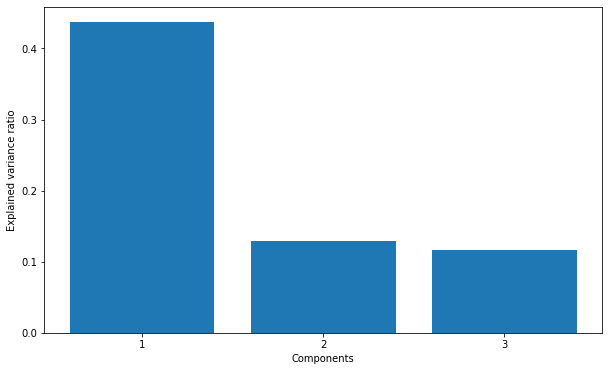

In [25]:
ev = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()

In [26]:
# we do the same for test
pca_test = PCA(n_components=3)
pcaNumModel_test = pca_test.fit(x_test)
principalComponents = pcaNumModel_test.transform(x_test)

print(np.sum(pcaNumModel_test.explained_variance_ratio_))

0.6896730664572298


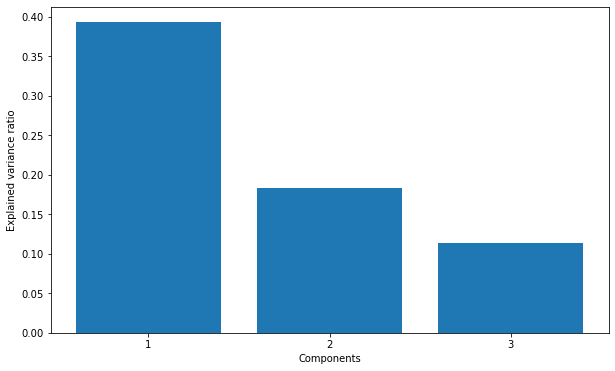

In [27]:
ev_test = pca_test.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev_test)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()
#theres a big difference in the 2nd component

**Likelihood** 

- The probability that the data belong to the principal components.
- We measure the goodness of fit of the PCA
- We will do it on test

In [28]:
logvero_PCA1 = pcaNumModel_test.score_samples(x_test)
mean = logvero_PCA1.mean()
std = logvero_PCA1.std()

print(mean-std)
print(mean+std)

-23.469893274445102
-1.7131610414286342


In [29]:
dt_test.loc[logvero_PCA1 <= mean-std,]

,Order,MS_Zoning,Lot_Frontage,Lot_Area,Land_Contour,Land_Slope,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Type,...,TotRms_AbvGrd,Garage_Cars,Garage_Area,Garage_Cond,Pool_Area,Pool_QC,Mo_Sold,Yr_Sold,SalePrice,Date_Sold
757,758,RM,41.0,5852,Bnk,Gtl,7,1902,2000,Stone,...,9,0,0.0,Sg,0,Sp,5,2009,97500,2009-05-01
314,315,RL,0.0,57200,Bnk,Sev,5,1948,1950,None,...,7,2,572.0,TA,0,Sp,6,2010,160000,2010-06-01
765,766,RL,0.0,10020,Low,Sev,1,1922,1950,None,...,4,0,0.0,Sg,0,Sp,3,2009,61000,2009-03-01
2279,2280,RM,62.0,6710,Lvl,Gtl,6,1996,1997,BrkFace,...,3,2,460.0,TA,0,Sp,6,2007,140000,2007-06-01
1767,1768,RL,104.0,21535,Lvl,Gtl,10,1994,1995,BrkFace,...,10,3,832.0,TA,0,Sp,1,2007,755000,2007-01-01
812,813,RL,64.0,7018,Lvl,Gtl,5,1979,1979,None,...,12,2,528.0,TA,0,Sp,6,2009,142953,2009-06-01
1760,1761,RL,160.0,15623,Lvl,Gtl,10,1996,1996,None,...,10,3,813.0,TA,555,Ex,7,2007,745000,2007-07-01
2666,2667,RM,90.0,22950,Lvl,Gtl,10,1892,1993,None,...,12,3,840.0,TA,0,Sp,6,2006,475000,2006-06-01
806,807,RL,120.0,26400,Bnk,Gtl,5,1880,2007,None,...,7,2,576.0,TA,0,Sp,6,2009,131000,2009-06-01
185,186,RM,50.0,9000,Lvl,Gtl,8,1890,2002,None,...,7,2,624.0,TA,0,Sp,4,2010,240000,2010-04-01


So far we have done a PCA with all numerical columns, which explains 66% of the data.
of the data; what we are going to do now is with a smaller subset of columns considering the relevant set.
the relevant set. To identify what is relevant, we will use correlations.

We will make a correlation with respect to the selling price and depending on the intensity of the correlation we will see which ones are relevant to put in the PCA.

**We are now going to perform a PCA with only the variables we consider relevant.** 

In [30]:
data_numeric = data.select_dtypes(include=np.number)
data_numeric.head(5)

,Order,Lot_Frontage,Lot_Area,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Garage_Cars,Garage_Area,Pool_Area,Mo_Sold,Yr_Sold,SalePrice
0,1,141.0,31770,6,1960,1960,1080,1,0,3,1,7,2,528.0,0,5,2010,215000
1,2,80.0,11622,5,1961,1961,882,1,0,2,1,5,1,730.0,0,6,2010,105000
2,3,81.0,14267,6,1958,1958,1329,1,1,3,1,6,1,312.0,0,6,2010,172000
3,4,93.0,11160,7,1968,1968,2110,2,1,3,1,8,2,522.0,0,4,2010,244000
4,5,74.0,13830,5,1997,1998,928,2,1,3,1,6,2,482.0,0,3,2010,189900


In [31]:
corr = data_numeric.corr().loc[['SalePrice']].sort_values('SalePrice',ascending=False)
corr = corr.T.sort_values('SalePrice',ascending=False)

<AxesSubplot:>

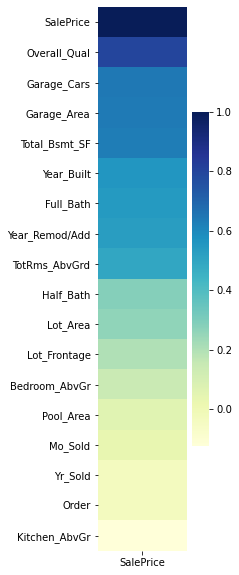

In [33]:
plt.subplots(figsize=(2,10))
sns.heatmap(corr, cmap="YlGnBu")

#we see that there is a point in the graph where the blue stops being so intense, starting at 0.7. 
#select up to TotRms_AbvGrd

In [34]:
vars_relevantes = dt_num_train.columns[dt_num_train.columns.isin(['SalePrice',
                                                             'Garage_Cars',
                                                             'Garage_Area',
 'Total_Bsmt_SF', 'Year_Built',
 'Full_Bath','Year_Remod/Add','TotRms_AbvGrd'])]

In [35]:
dt_num_trainPCA_relevantes = dt_num_train.loc[:,vars_relevantes]
dt_num_testPCA_relevantes = dt_test.loc[:,vars_relevantes]

In [36]:
#PCA:

train_scaler_relevantes = StandardScaler().fit(dt_num_trainPCA_relevantes)
x_train_relevantes = train_scaler_relevantes.transform(dt_num_trainPCA_relevantes)
x_test_relevantes = train_scaler_relevantes.transform(dt_num_testPCA_relevantes)

pca_relevantes = PCA(n_components=3)
pcaNumModel_relevantes = pca.fit(x_train_relevantes)
principalComponents_relevantes = pcaNumModel_relevantes.transform(x_train_relevantes)

In [37]:
print(np.sum(pcaNumModel_relevantes.explained_variance_ratio_))

#The result now its higher. 

0.7809166994015972


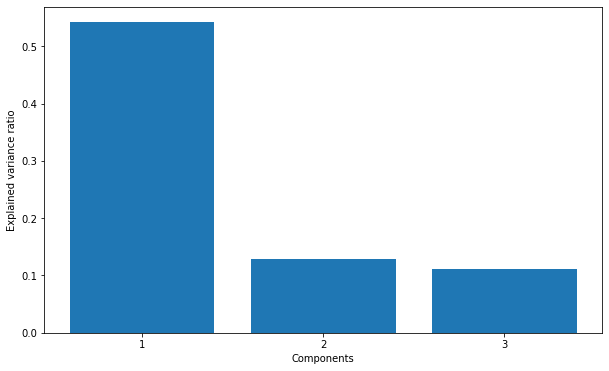

In [38]:
#plot

ev_relevantes = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev_relevantes)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()

In [39]:
# We do the same on test

pca_test_relevantes = PCA(n_components=3)
pcaNumModel_test_relevantes = pca_test_relevantes.fit(x_test_relevantes)
principalComponents_relevantes = pcaNumModel_test_relevantes.transform(x_test_relevantes)

print(np.sum(pcaNumModel_test_relevantes.explained_variance_ratio_)) 

0.7756061038237853


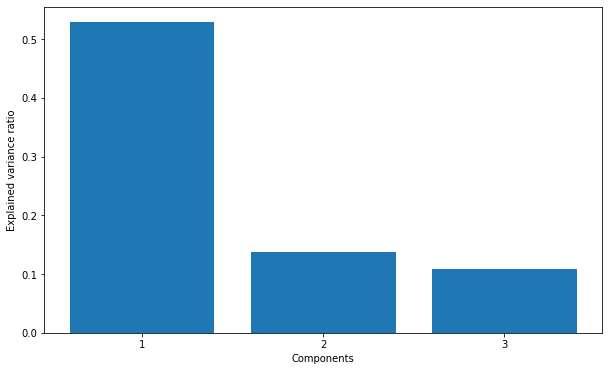

In [40]:
ev_test_relevantes = pca_test_relevantes.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev_test_relevantes)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()

In [41]:
#we measure the likelyhood once again. 

logvero_PCA2 = pcaNumModel_test_relevantes.score_samples(x_test_relevantes)
mean_relevantes = logvero_PCA2.mean()
std_relevantes = logvero_PCA2.std()

print(mean_relevantes-std)
print(mean_relevantes+std)

# The result is better than before

-20.194533343464876
1.5621988895515937


In [42]:
dt_test.loc[logvero_PCA2 <= mean-std,]

,Order,MS_Zoning,Lot_Frontage,Lot_Area,Land_Contour,Land_Slope,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Type,...,TotRms_AbvGrd,Garage_Cars,Garage_Area,Garage_Cond,Pool_Area,Pool_QC,Mo_Sold,Yr_Sold,SalePrice,Date_Sold
1767,1768,RL,104.0,21535,Lvl,Gtl,10,1994,1995,BrkFace,...,10,3,832.0,TA,0,Sp,1,2007,755000,2007-01-01
1760,1761,RL,160.0,15623,Lvl,Gtl,10,1996,1996,None,...,10,3,813.0,TA,555,Ex,7,2007,745000,2007-07-01
2666,2667,RM,90.0,22950,Lvl,Gtl,10,1892,1993,None,...,12,3,840.0,TA,0,Sp,6,2006,475000,2006-06-01
806,807,RL,120.0,26400,Bnk,Gtl,5,1880,2007,None,...,7,2,576.0,TA,0,Sp,6,2009,131000,2009-06-01
185,186,RM,50.0,9000,Lvl,Gtl,8,1890,2002,None,...,7,2,624.0,TA,0,Sp,4,2010,240000,2010-04-01
1945,1946,RL,113.0,21281,Lvl,Gtl,5,1935,2007,None,...,9,3,1200.0,TA,0,Sp,11,2007,301600,2007-11-01
46,47,RL,110.0,14300,HLS,Mod,9,2003,2004,BrkFace,...,10,3,958.0,TA,0,Sp,6,2010,500000,2010-06-01


#### 2- Algorithm to identify outliers

####  - Kmeans

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [44]:
data_kmeans = data.loc[:,vars_wo_ms]

In [45]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

#kmeans

score = [kmeans[i].fit(data_kmeans).score(data_kmeans) for i in range(len(kmeans))]

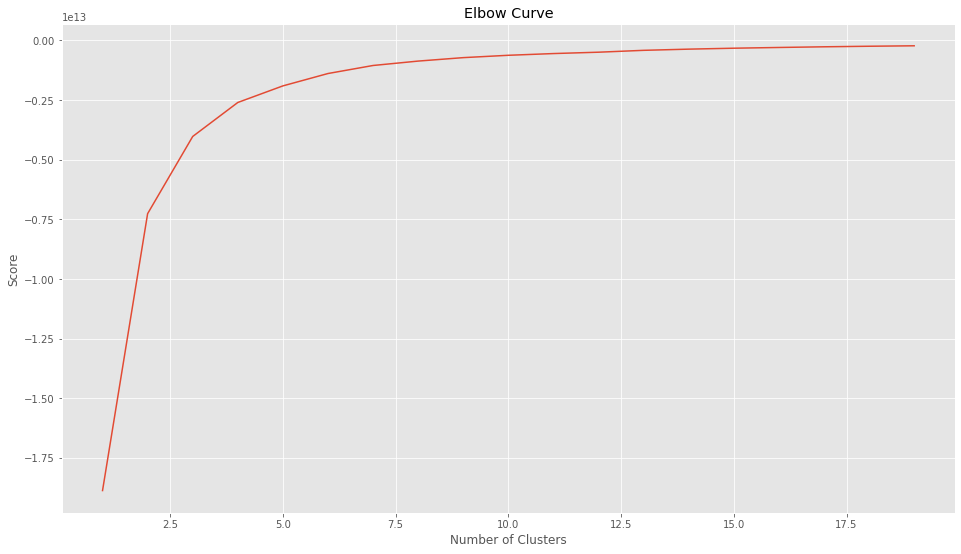

In [46]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [47]:
# Considering the plot we decide to pick 5 clusters.

kmeans = KMeans(n_clusters=5).fit(data_kmeans)
centroids = kmeans.cluster_centers_

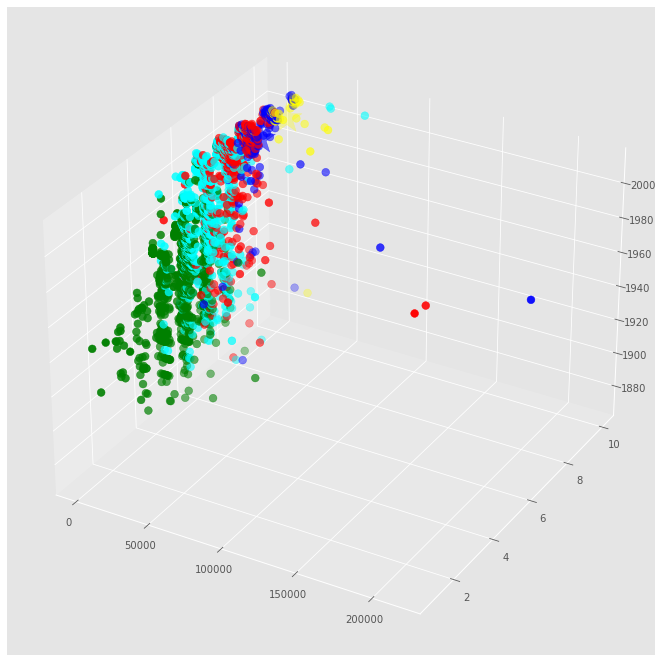

In [48]:
X = data_kmeans
labels = kmeans.predict(data_kmeans)

# we obtain the centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

#we can clearly see that theres no overlapping and a clear sepparation

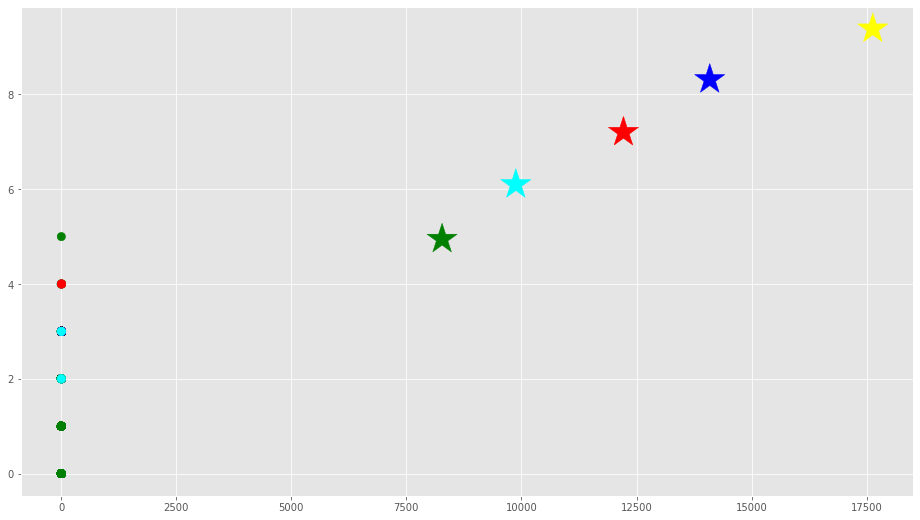

In [49]:
# Here we have another perspective in 2 axis 
f1 = data_kmeans['Overall_Qual'].values
f2 = data_kmeans['Garage_Cars'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [50]:
data_kmeans['label'] = labels

In [51]:
data_kmeans.groupby("label").size()

label
0     558
1    1064
2     212
3    1057
4      39
dtype: int64

#### 3 - You studied the relationship of the price variable with the rest of the quantitative variables during 2009 and 2010. Study the correlation between them and argue the use of PCA or KernelPCA based on those relationships.

In [52]:
# Same but in 2009-2010
# we filter by years 2009 and 2010

data_09_10 = data[data['Yr_Sold'].isin([2009,2010])]
data_09_10.head(2)

#we select only numerical variables
data_09_10_numeric = data_09_10.select_dtypes(include=np.number)
data_09_10_numeric.head(5)

,Order,Lot_Frontage,Lot_Area,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Garage_Cars,Garage_Area,Pool_Area,Mo_Sold,Yr_Sold,SalePrice
0,1,141.0,31770,6,1960,1960,1080,1,0,3,1,7,2,528.0,0,5,2010,215000
1,2,80.0,11622,5,1961,1961,882,1,0,2,1,5,1,730.0,0,6,2010,105000
2,3,81.0,14267,6,1958,1958,1329,1,1,3,1,6,1,312.0,0,6,2010,172000
3,4,93.0,11160,7,1968,1968,2110,2,1,3,1,8,2,522.0,0,4,2010,244000
4,5,74.0,13830,5,1997,1998,928,2,1,3,1,6,2,482.0,0,3,2010,189900


In [53]:
corr = data_09_10_numeric.corr().loc[['SalePrice']].sort_values('SalePrice',ascending=False)
corr = corr.T.sort_values('SalePrice',ascending=False)

<AxesSubplot:>

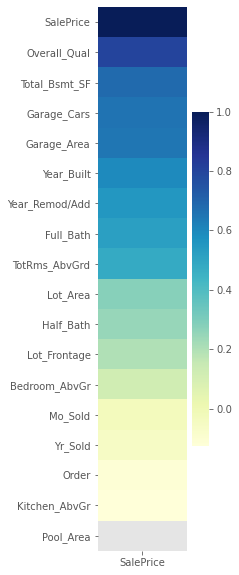

In [54]:
plt.subplots(figsize=(2,10))
sns.heatmap(corr, cmap="YlGnBu")

### Why using PCA vs Kernel:

If much of the graph were linear it would mean that there is not much linear correlation between the data. However, in the graph most of it is blue, which means that a linear relationship can be obtained on which to make a PCA. If this situation did not occur, we would apply Kernel PCA. Since it is observed that there is a linear relationship of Sales Prices with several variables I show in the following graphs that the variables do follow a linear relationship.

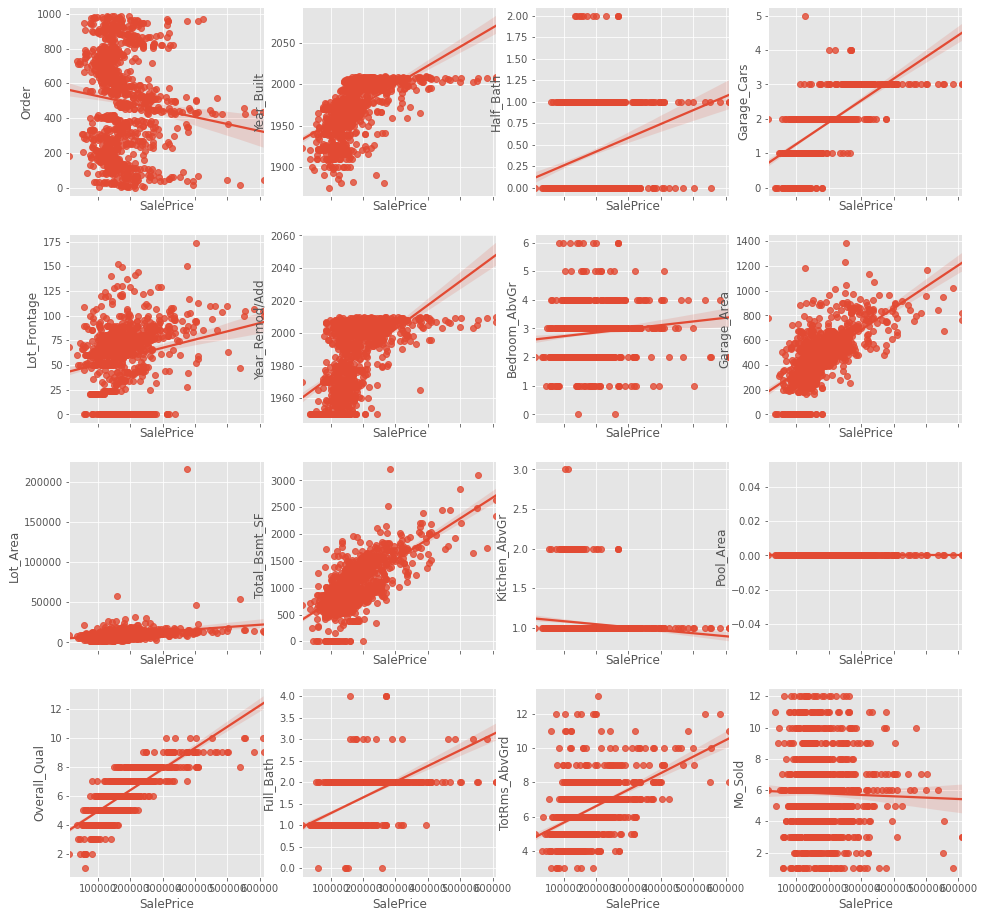

In [55]:
cols = data_09_10_numeric.columns.to_list()
cols.remove("SalePrice")
cols.remove("Yr_Sold")

fig, axes = plt.subplots(4, 4, figsize=(16, 16), sharex=True)
for x in range(0,4):
    for y in range(0,4):
        sns.regplot(ax=axes[x][y], x = data_09_10_numeric["SalePrice"], y= data_09_10_numeric[cols[y*4 + x]])
plt.show()

#### 3.1- Describe the 3 main components obstained. Explain their variance and relationship.

####  PCA

In [56]:
train_index = np.random.choice(data_09_10.index,round(data_09_10.shape[0]*0.8),replace=False)
test_index = data_09_10.index[data_09_10.index.isin(train_index) == False]

data_train_09_10 = data_09_10.copy().iloc[train_index,]
data_test_09_10 = data_09_10.copy().iloc[test_index,]
data_test_09_10 = data_09_10.copy().drop(train_index, axis=0)


from sklearn.model_selection import train_test_split
dt_train_09_10, dt_test_09_10 = train_test_split(data_09_10, test_size =0.2)

dt_train_09_10.reset_index(drop=True)

dt_num_train_09_10 = dt_train_09_10.select_dtypes(include=np.number)

In [57]:
dt_num_train_PCA_09_10 = dt_num_train.loc[:,vars_wo_ms]
dt_num_test_PCA_09_10 = dt_test_09_10.loc[:,vars_wo_ms]

In [58]:
train_scaler_09_10 = StandardScaler().fit(dt_num_train_PCA_09_10)

x_train_09_10 = train_scaler_09_10.transform(dt_num_train_PCA_09_10)

x_test_09_10 = train_scaler_09_10.transform(dt_num_test_PCA_09_10)

In [59]:
pca_09_10 = PCA(n_components=3)
pcaNumModel_09_10 = pca_09_10.fit(x_train_09_10)
principalComponents_09_10 = pcaNumModel_09_10.transform(x_train_09_10)

print(np.sum(pcaNumModel_09_10.explained_variance_ratio_))

# is above 50% then the PCA is satisfactory.

0.6830993772037822


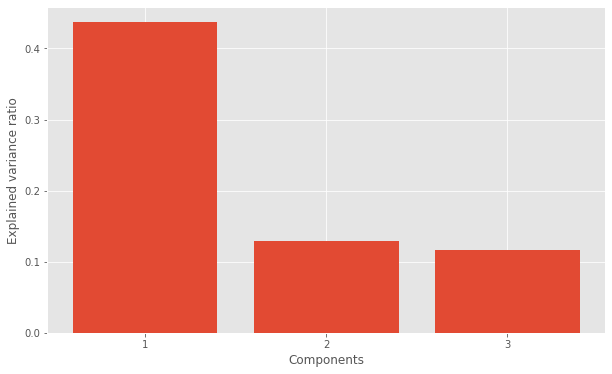

In [60]:
ev_09_10 = pca_09_10.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev_09_10)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()

### PART 2

#### 4- In the previous analysis we asked you to segment the sales price variable. Choose a couple of continuous variables more related to the value of the house and perform a cluster analysis.



#### OPTION 1:

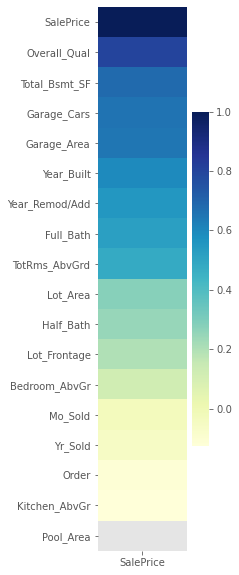

In [61]:
#We perform it in 2009 y 2010 

# we perform a correlation matrix to see which of the variables are more correlated with the price. 

corr = data_09_10_numeric.corr().loc[['SalePrice']].sort_values('SalePrice',ascending=False)
corr = corr.T.sort_values('SalePrice',ascending=False)
plt.subplots(figsize=(2,10))
sns.heatmap(corr, cmap="YlGnBu")

#seleccionamos las mas cercanas, la intensidad mas alta sin importar el signo. 

vars_relevantes_09_10 = data_09_10_numeric.columns[data_09_10_numeric.columns.isin(['SalePrice',
                                                             'Overall_Qual','Total_Bsmt_SF'])]

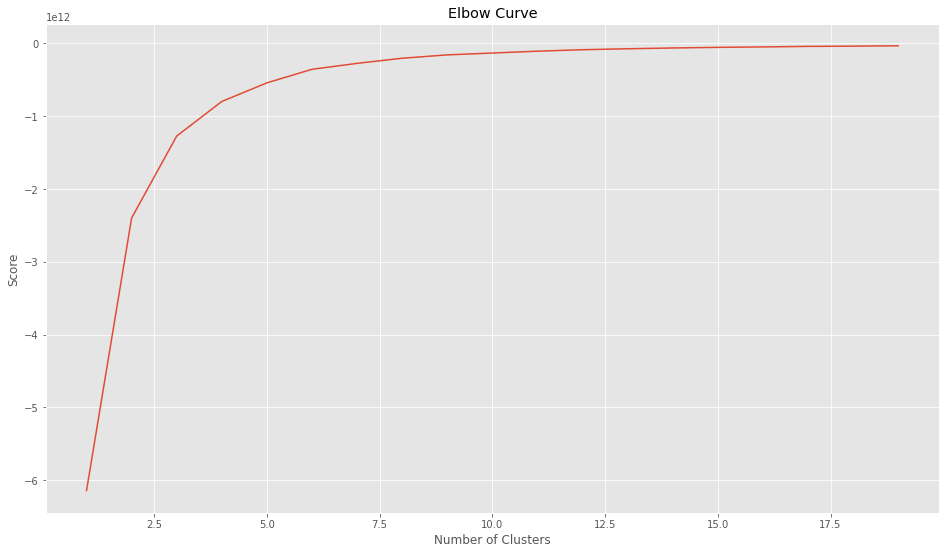

In [62]:
# in this set we perform our kmeans

data_kmeans_09_10 = data_09_10_numeric.loc[:,vars_relevantes_09_10]

Nc_09_10 = range(1, 20)

kmeans_09_10 = [KMeans(n_clusters=i) for i in Nc_09_10]

#kmeans

score_09_10 = [kmeans_09_10[i].fit(data_kmeans_09_10).score(data_kmeans_09_10) for i in range(len(kmeans_09_10))]
score_09_10

#plot

plt.plot(Nc_09_10,score_09_10)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


[[8.40298507e+00 1.67402985e+03 3.41713716e+05]
 [5.88089330e+00 9.85126551e+02 1.61770102e+05]
 [7.18224299e+00 1.29286916e+03 2.35148743e+05]
 [9.23076923e+00 2.25584615e+03 5.20259769e+05]
 [4.80136986e+00 7.56469178e+02 1.06960832e+05]]


label
0     67
1    403
2    214
3     13
4    292
dtype: int64

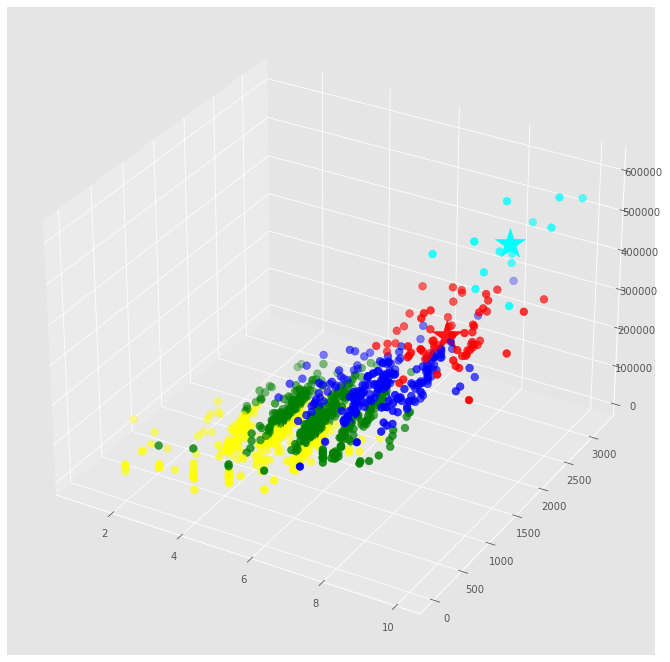

In [63]:
# we pick 5 clusters. 

kmeans_09_10 = KMeans(n_clusters=5).fit(data_kmeans_09_10)
centroids_09_10 = kmeans_09_10.cluster_centers_
print(centroids_09_10)

X_09_10 = data_kmeans_09_10
labels_09_10 = kmeans_09_10.predict(data_kmeans_09_10)

# we obtain the centers

C_09_10 = kmeans_09_10.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]

for row in labels_09_10:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_09_10.iloc[:, 0], X_09_10.iloc[:, 1], X_09_10.iloc[:, 2], c=asignar,s=60)
ax.scatter(C_09_10[:, 0], C_09_10[:, 1], C_09_10[:, 2], marker='*', c=colores, s=1000)

#We see that there is little overlap and there is sufficient differentiation.

data_kmeans_09_10['label'] = labels_09_10

data_kmeans_09_10.groupby("label").size()

#### 5- TSNE. 

<AxesSubplot:>

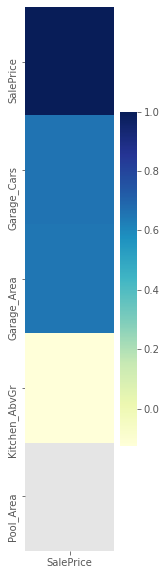

In [64]:
#select the dataset containing only those columns: 

vars_tsne = data_09_10_numeric.columns[data_09_10_numeric.columns.isin(['Kitchen_AbvGr','Pool_Area','Garage_Cars',
                                                                        'Garage_Area','SalePrice'])]

data_tsne = data_09_10_numeric.loc[:,vars_tsne]


#correlation matrix
corr_tsne = data_tsne.corr().loc[['SalePrice']].sort_values('SalePrice',ascending=False)
corr_tsne = corr_tsne.T.sort_values('SalePrice',ascending=False)
plt.subplots(figsize=(2,10))
sns.heatmap(corr_tsne, cmap="YlGnBu")

We see that the most influential is the garage area and garage cars, but even so we also take the rest of the variables that it specifies in the statement.
in the statement. however, the kitchen area is slightly more influential than the pool area. 

In [65]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler

data_tsne.drop(['SalePrice'],axis=1,inplace=True)

nrm = Normalizer()

nrm.fit(data_tsne)

normal_data = nrm.transform(data_tsne)

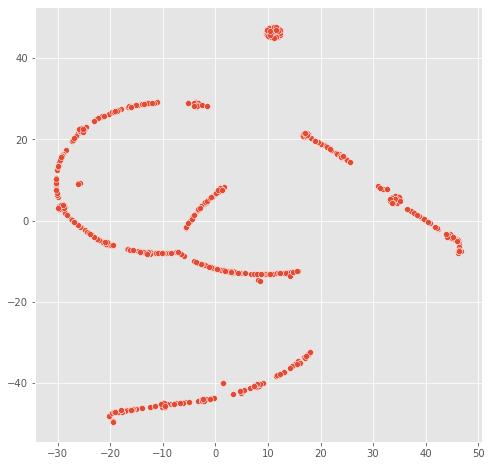

In [66]:
from sklearn.manifold import TSNE

tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(normal_data)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1]);

#we see that there is a separation of 5 clusters. 5 groups of houses, that is to say, 5 price brackets 

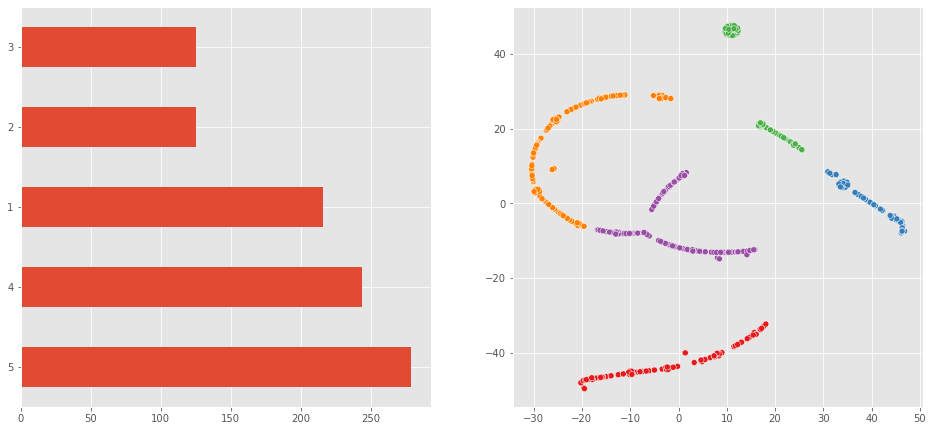

In [67]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage,fcluster
from scipy.spatial.distance import pdist

link = ward(res_tsne)

vb = fcluster(link,t=300, criterion='distance')

fig = plt.figure(figsize=(25,25))

ax1 = fig.add_subplot(3,3,1)

pd.value_counts(vb).plot(kind='barh')

ax2 = fig.add_subplot(3,3,2)

axpl_2 = sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");


axpl_2.legend_.remove()

#we see that there is no overlapping or noise, the colors are not overlapped.

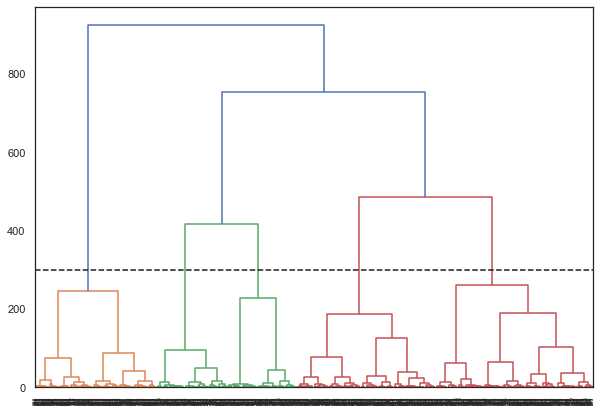

In [68]:
#plot

sns.set(style='white')
plt.figure(figsize=(10,7))
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [300,300],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

#short 5, i.e. repeats what we have seen in the previous graph. 

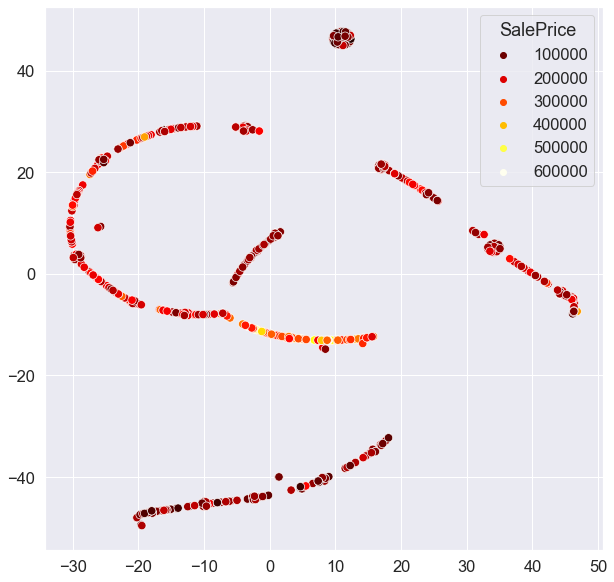

In [69]:
#we segment by price ranges, but we see that there is no influence on the price of these characteristics.
#Regarding the price, there is no difference. regarding the characteristics, there are 5 groups. 

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],\
                     hue=data_09_10_numeric['SalePrice'],s=70,palette="hot");#,palette="RdBu");

#### 5.1- How well do you distinguish between stone and brick facade houses when designing?

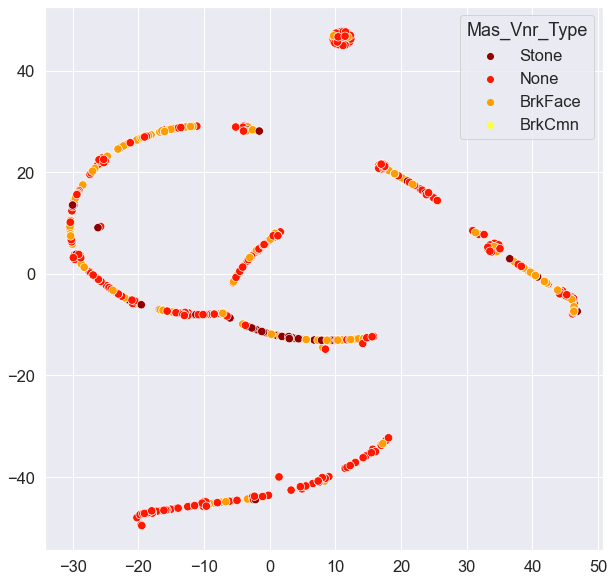

In [70]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],\
                     hue=data_09_10['Mas_Vnr_Type'],s=70,palette="hot");#,palette="RdBu");

#There is no differentiation, there is a lot of noise, it is mixed. There is no limit between the two. 

#### 6- The main characteristics of dwellings with stone facades versus those with exposed brick facades were described. Compare the result of a cluster analysis on the most important variables of this comparison (if too many apply a previous PCA) with the variable type of stone, does the generated cluster represent well that target variable?

In [71]:
#we divide the dataset into 2 and then do cluster analysis 
#everything that has bruick and everything that has stone 

valores_brick = data["Mas_Vnr_Type"].unique()

#print(valores_brick)

#grupo_brick = data[data.isin(data)== %brick%]
grupo_brick = data[data["Mas_Vnr_Type"].isin(["BrkFace", "BrkCmn"])]
grupo_stone = data[data["Mas_Vnr_Type"].isin(["Stone"])] 

In [72]:
#we select numerical values

grupo_brick_numerico = grupo_brick.select_dtypes(include=np.number)
grupo_stone_numerico = grupo_stone.select_dtypes(include=np.number)

#print(grupo_brick_numerico.head())
#print(grupo_stone_numerico.head())

In [73]:
#print(missing_summary(grupo_brick_numerico))
#print(missing_summary(grupo_stone_numerico))

#we see there are no missing values

In [74]:
 # we create a function aswell with kmeans 
def PCA_grupos(grupo_fachada):

    train_scaler = StandardScaler().fit(grupo_fachada)

    x_train = train_scaler.transform(grupo_fachada)

    pca = PCA(n_components=3)
    pcaNumModel = pca.fit(x_train)
    pca_train = pcaNumModel.transform(x_train)


    print(np.sum(pcaNumModel.explained_variance_ratio_))
    
    #ver el contenido de las variables del PCA
    
    df = pd.DataFrame({'PCA':pca.components_[0], 'Variable Names':list(grupo_fachada.columns)})
    df = df.sort_values('PCA', ascending=False)
    df2 = pd.DataFrame(df)
    df2['PCA']=df2['PCA'].apply(np.absolute)
    df2 = df2.sort_values('PCA', ascending=False)
    df.head()
    
    return df

In [75]:
PCA_grupos(grupo_brick_numerico)

0.5281104266642223


,PCA,Variable Names
17,0.388495,SalePrice
3,0.370291,Overall_Qual
12,0.361234,Garage_Cars
13,0.347130,Garage_Area
4,0.314906,Year_Built
5,0.301113,Year_Remod/Add
7,0.297952,Full_Bath
6,0.265953,Total_Bsmt_SF
11,0.254233,TotRms_AbvGrd
2,0.124486,Lot_Area


In [76]:
PCA_grupos(grupo_stone_numerico)

0.554002903021138


,PCA,Variable Names
3,0.371607,Overall_Qual
12,0.346329,Garage_Cars
13,0.338923,Garage_Area
17,0.335336,SalePrice
4,0.298337,Year_Built
11,0.287870,TotRms_AbvGrd
5,0.285353,Year_Remod/Add
6,0.279250,Total_Bsmt_SF
7,0.261899,Full_Bath
1,0.233508,Lot_Frontage


In [77]:
#we choose the cut-off value as 0.25 upwards. 
#we see that they do not influence in the same way. 

grupo_brick_relevantes = grupo_brick_numerico.loc[:,["SalePrice","Overall_Qual","Garage_Cars","Garage_Area","Year_Built",
                                                  "Year_Remod/Add","Full_Bath"]]
grupo_stone_relevantes = grupo_stone_numerico.loc[:,["Overall_Qual","Garage_Cars","SalePrice","Garage_Area","Year_Built", 
                                                  "Year_Remod/Add","TotRms_AbvGrd","Total_Bsmt_SF"]]

In [78]:
def k_means_grupos(tipo_fachada):
    
    Numero_centroides = range(1, 20)
    kmeans_fachada = [KMeans(n_clusters=i) for i in Numero_centroides]

    #kmeans

    score_fachada = [kmeans_fachada[i].fit(tipo_fachada).score(tipo_fachada) for i in range(len(kmeans_fachada))]
    score_fachada

    #plot

    plt.plot(Numero_centroides,score_fachada)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()


    # we pick 5 clusters

    kmeans_fachada = KMeans(n_clusters=5).fit(tipo_fachada)
    centroides_fachada = kmeans_fachada.cluster_centers_
    print(centroides_fachada)

    # we get the labels 

    X_fachada = tipo_fachada
    labels_fachada = kmeans_fachada.predict(tipo_fachada)

    # centers
    
    C_fachada = kmeans_fachada.cluster_centers_
    colores =['red','green','blue','cyan','yellow']
    asignar =[]
    for row in labels_fachada:
        asignar.append(colores[row])

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X_fachada.iloc[:, 0], X_fachada.iloc[:, 1], X_fachada.iloc[:, 2], c=asignar,s=60)
    ax.scatter(C_fachada[:, 0], C_fachada[:, 1], C_fachada[:, 2], marker='*', c=colores, s=1000)

    #there is no overlapping.

    tipo_fachada['label'] = labels_fachada

    output_kmeans = tipo_fachada.groupby("label").size()

    return output_kmeans

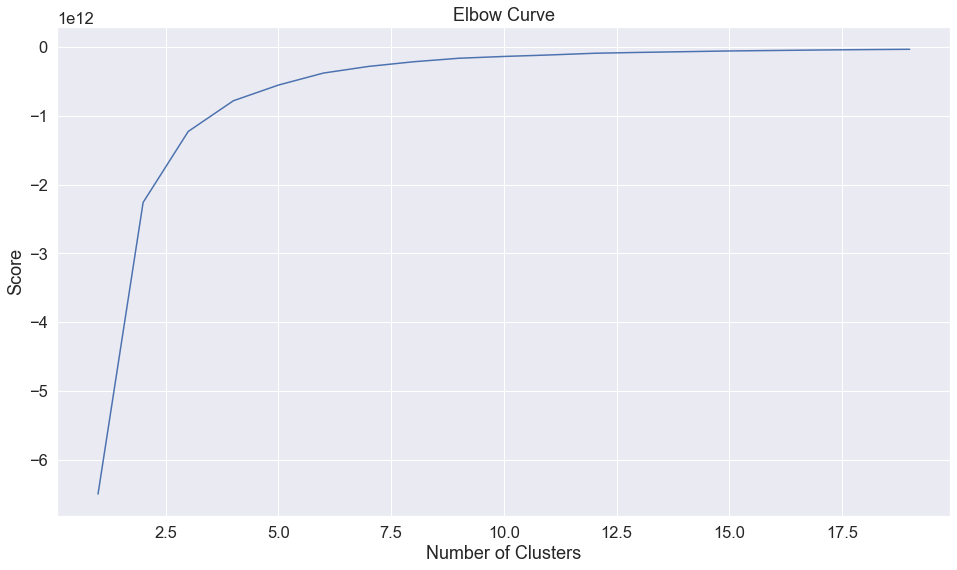

[[1.38680239e+05 5.54178674e+00 1.53890490e+00 4.13089337e+02
  1.96958213e+03 1.97517291e+03 1.30547550e+00]
 [2.79460404e+05 7.70175439e+00 2.50292398e+00 6.60654971e+02
  1.99600585e+03 1.99921053e+03 2.01754386e+00]
 [1.98152968e+05 6.64285714e+00 2.09740260e+00 5.36282468e+02
  1.98792857e+03 1.99190584e+03 1.90584416e+00]
 [3.84792457e+05 8.67142857e+00 2.92857143e+00 8.19985714e+02
  2.00150000e+03 2.00301429e+03 2.02857143e+00]
 [5.70153111e+05 9.33333333e+00 3.00000000e+00 9.42111111e+02
  2.00155556e+03 2.00211111e+03 2.55555556e+00]]


label
0    347
1    171
2    308
3     70
4      9
dtype: int64

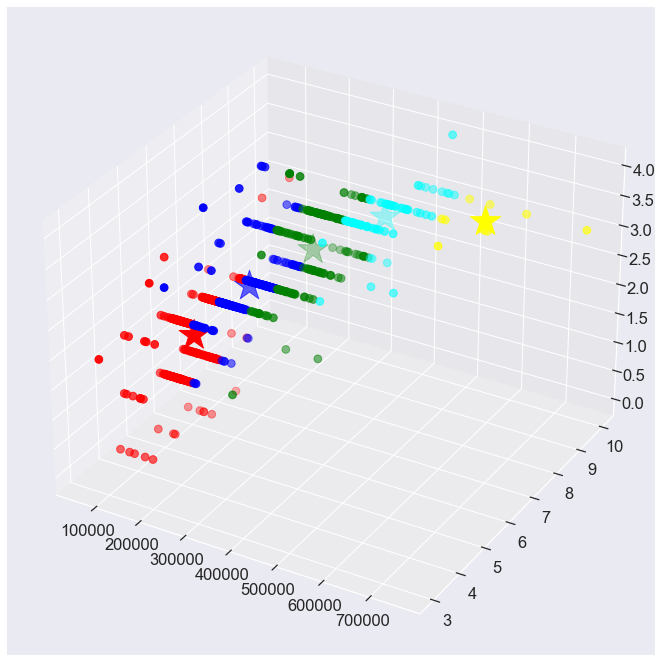

In [79]:
k_means_grupos(grupo_brick_relevantes)

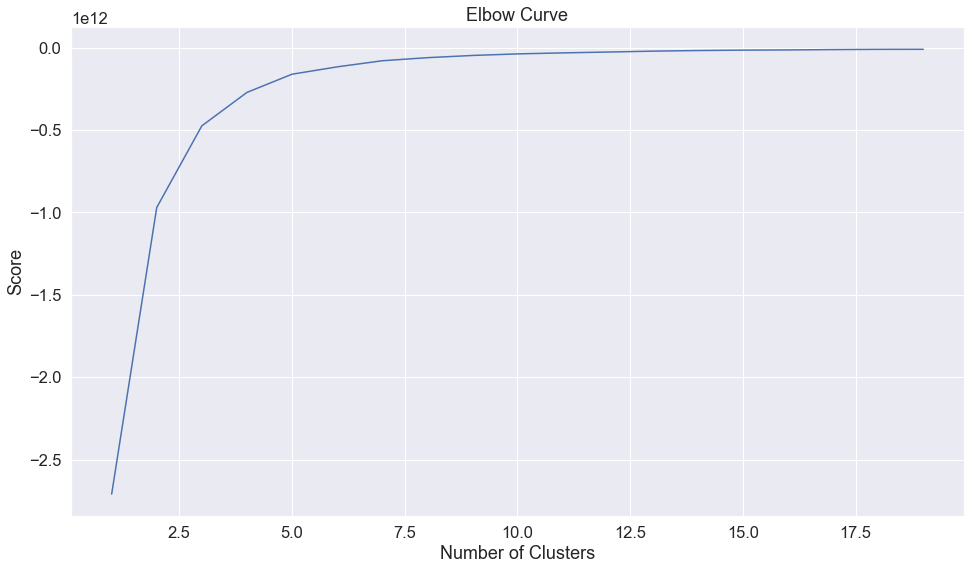

[[8.22413793e+00 2.84482759e+00 3.07329241e+05 7.77534483e+02
  2.00558621e+03 2.00662069e+03 7.65517241e+00 1.50113793e+03]
 [6.14492754e+00 1.82608696e+00 1.53512014e+05 4.88130435e+02
  1.97655072e+03 1.98250725e+03 6.40579710e+00 1.20366667e+03]
 [9.55555556e+00 3.00000000e+00 5.68889778e+05 8.47777778e+02
  2.00644444e+03 2.00700000e+03 9.66666667e+00 2.31922222e+03]
 [8.70967742e+00 2.90322581e+00 4.09072613e+05 7.85677419e+02
  2.00729032e+03 2.00764516e+03 8.19354839e+00 1.83722581e+03]
 [7.26829268e+00 2.29268293e+00 2.27531622e+05 6.33817073e+02
  2.00051220e+03 2.00228049e+03 6.45121951e+00 1.41124390e+03]]


label
0    58
1    69
2     9
3    31
4    82
dtype: int64

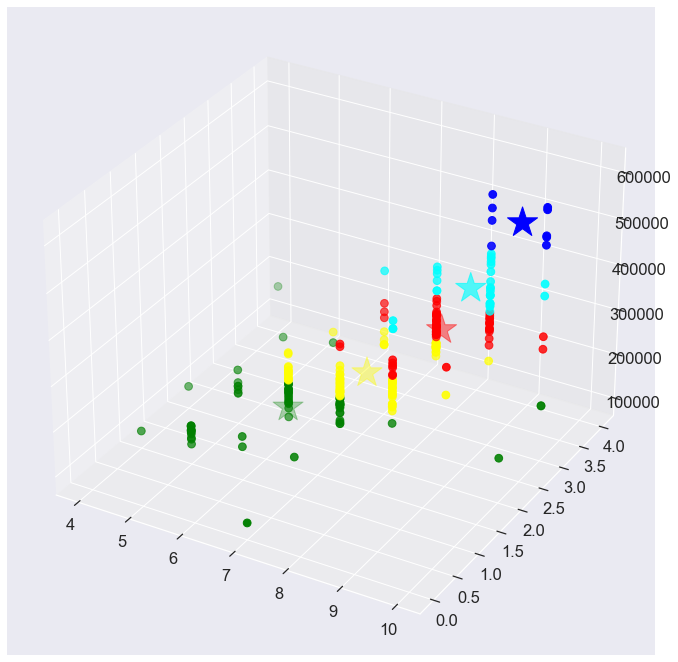

In [80]:
k_means_grupos(grupo_stone_relevantes)